In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [38]:

# Ruta del archivo local
ruta_archivo = "./calidadvino.csv"  # Reemplaza esta ruta con la ruta de tu archivo local

# Cargar el dataset desde la ruta local
data = pd.read_csv(ruta_archivo, encoding='latin1', delimiter=',')  # Ajusta la codificación y el delimitador según tu archivo


In [39]:

print(data.head())
data.info()


   Unnamed: 0  Tartaric Acid  Grape Density  Citric Acid  Residual.sugar  \
0           1            7.4           0.70         0.00             1.9   
1           2            7.8           0.88         0.00             2.6   
2           3            7.8           0.76         0.04             2.3   
3           4           11.2           0.28         0.56             1.9   
4           5            7.4           0.70         0.00             1.9   

   Sodium chloride  Free.sulfur.dioxide  Bound.sulfur.dioxide  \
0            0.076                 11.0                  34.0   
1            0.098                 25.0                  67.0   
2            0.092                 15.0                  54.0   
3            0.075                 17.0                  60.0   
4            0.076                 11.0                  34.0   

   Alcohol Density  PH Levels  Potassium chloride  Alcohol Content  
0           0.9978       3.51                0.56              9.4  
1           0.

In [40]:
# Seleccionar las columnas numéricas que serán usadas para PCA
features = ['Tartaric Acid','Grape Density','Citric Acid','Residual.sugar','Sodium chloride','Free.sulfur.dioxide',
            'Bound.sulfur.dioxide','Alcohol Density','PH Levels','Potassium chloride','Alcohol Content']
x = data[features].values

# Estandarizar los datos
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [41]:
# Inicializar PCA con el número de componentes deseado (por ejemplo, 4 componentes principales)
pca = PCA(n_components=4)

# Ajustar PCA a los datos escalados
principal_components = pca.fit_transform(x_scaled)


In [42]:

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2','PCA3','PCA4'])

# Mostrar las primeras filas del nuevo DataFrame
print(pca_df.head())


       PCA1      PCA2      PCA3      PCA4
0 -1.619530  0.450950 -1.774454  0.043740
1 -0.799170  1.856553 -0.911690  0.548066
2 -0.748479  0.882039 -1.171394  0.411021
3  2.357673 -0.269976  0.243489 -0.928450
4 -1.619530  0.450950 -1.774454  0.043740


In [43]:
# Crear el DataFrame con las contribuciones de cada variable a los componentes principales
pca_contrib_df = pd.DataFrame(
    data    = pca.components_,
    columns = features,       # Las 11 columnas originales
    index   = ['PCA1', 'PCA2', 'PCA3', 'PCA4']  # Los 4 componentes principales
)


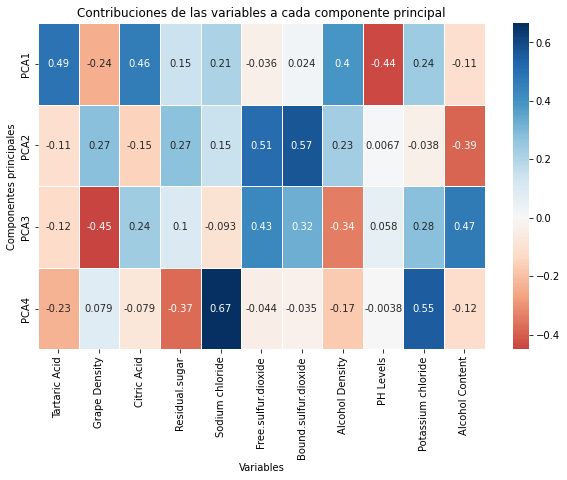

In [44]:
# Crear un heatmap con los datos de la matriz de componentes
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
sns.heatmap(
    data       = pca_contrib_df,      # Datos de las contribuciones
    annot      = True,                # Mostrar los valores en cada celda
    cmap       = 'RdBu',              # Color de la escala, rojo (alto positivo) a azul (alto negativo)
    center     = 0,                   # Centramos la escala en 0
    linewidths = 0.5                  # Añadir líneas entre celdas
)

plt.title('Contribuciones de las variables a cada componente principal')
plt.xlabel('Variables')
plt.ylabel('Componentes principales')
plt.show()


C:\Users\leli_\AppData\Local\Temp\ipykernel_8548\1907526640.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, palette='Set1')


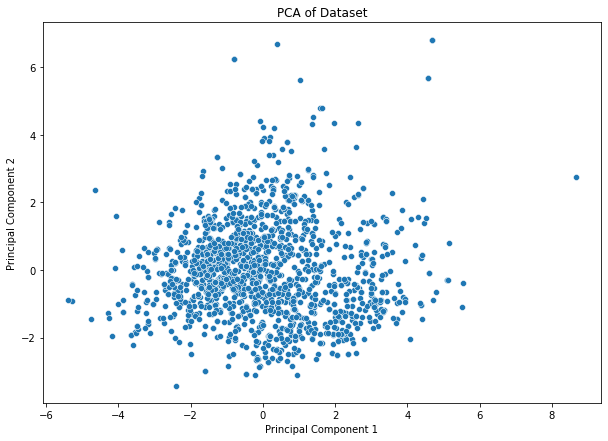

In [45]:
# Visualizar los componentes principales con un scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, palette='Set1')
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


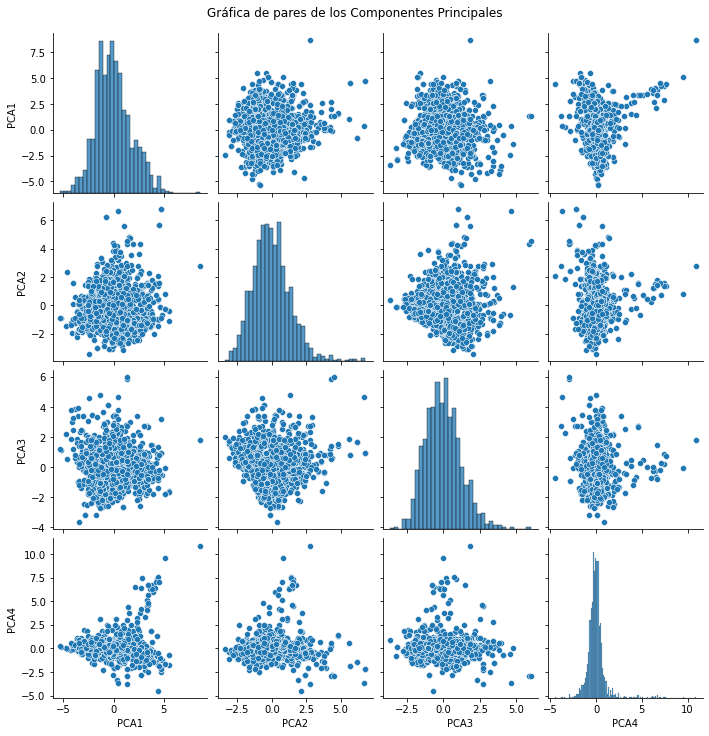

In [48]:
# Visualizar todas las combinaciones de los componentes principales en un gráfico de pares
sns.pairplot(pca_df)
plt.suptitle('Gráfica de pares de los Componentes Principales', y=1.02)  # Añade un título a la grilla
plt.show()


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.28173931 0.1750827  0.1409585  0.11029387]


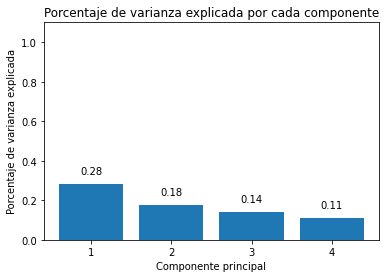

In [46]:

# Porcentaje de varianza explicada por cada componente
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

# Crear una gráfica de barras para visualizar el porcentaje de varianza explicada
ax.bar(
    x      = np.arange(pca.n_components_) + 1,  # Número de componentes principales
    height = pca.explained_variance_ratio_      # Porcentaje de varianza explicada por cada componente
)

# Añadir etiquetas a cada barra (el porcentaje de varianza explicada)
for x, y in zip(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)  # Redondear el porcentaje a 2 decimales
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",  # Alinear el texto
        xytext=(0, 10),              # Separación en pixeles sobre la barra
        ha='center'                  # Alinear horizontalmente en el centro de la barra
    )

# Configuración de los ejes
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)  # Límite del eje Y
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Porcentaje de varianza explicada')

plt.show()


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.28173931 0.45682201 0.59778051 0.70807438]


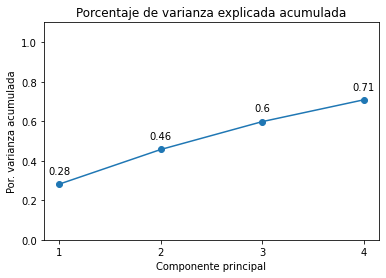

In [47]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(pca.n_components_) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(pca.n_components_) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
plt.show()
